In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick  # Import the ticker module

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/google-play-store-apps/googleplaystore.csv
/kaggle/input/google-play-store-apps/license.txt
/kaggle/input/google-play-store-apps/googleplaystore_user_reviews.csv


We import necessary libraries for data analysis and visualization. 
- `numpy`: Helps in handling numbers and arrays.
- `pandas`: Used to manipulate and analyze the data.
- `matplotlib` and `seaborn`: Used to create beautiful graphs and charts.
- `os`: Helps us navigate the file system to find our dataset.

# 1️⃣ Introduction

In [2]:
path = '/kaggle/input/google-play-store-apps/googleplaystore.csv'
df = pd.read_csv(path)
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up



We load the dataset from the path where it is stored and display the first 5 rows. This helps us understand what the data looks like and check if everything is in order.

## 2️⃣ Data Cleaning 🧹

In [3]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

We check if there is any missing data in the dataset. It helps us find columns where data might be missing, so we can handle it properly.

In [4]:
df['Rating']= df['Rating'].fillna(df['Rating'].mean())

If some ratings are missing, we fill those gaps with the average rating. This ensures the data is complete and prevents errors during analysis.

In [5]:
df['Rating']=df['Rating'].round(1)
df['Rating'].unique()

array([ 4.1,  3.9,  4.7,  4.5,  4.3,  4.4,  3.8,  4.2,  4.6,  3.2,  4. ,
        4.8,  4.9,  3.6,  3.7,  3.3,  3.4,  3.5,  3.1,  5. ,  2.6,  3. ,
        1.9,  2.5,  2.8,  2.7,  1. ,  2.9,  2.3,  2.2,  1.7,  2. ,  1.8,
        2.4,  1.6,  2.1,  1.4,  1.5,  1.2, 19. ])

We round the ratings to one decimal point, so they are cleaner and easier to understand. This makes the ratings consistent, with values like 4.2, 4.5, etc.

In [6]:
df = df.drop(columns=['Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'])

We remove columns that we don’t need for our analysis, like 'Content Rating', 'Genres', etc. This simplifies our dataset, making it easier to work with.

In [7]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0


We display the first few rows of the dataset to quickly verify how the data looks after cleaning. This helps us ensure the data is ready for further analysis.

In [8]:
df.dtypes

App          object
Category     object
Rating      float64
Reviews      object
Size         object
Installs     object
Type         object
Price        object
dtype: object

We check the data types of each column (e.g., whether the data is text, numbers, etc.) to make sure they are appropriate for the analysis.

In [9]:
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

We convert the 'Reviews' column to numbers because some values might be in text format. This helps us perform calculations and analysis without errors.

In [10]:
def clean_size(value):
    """
    Convert app size from strings like "25M", "1.5k", "2G" to a numeric format (MB).
    """
    if isinstance(value, str):  # Check if the value is a string
        if 'M' in value:  # If it has 'M' (Megabytes)
            return float(value.replace('M', ''))  # Remove 'M' and convert to float
        elif 'k' in value:  # If it has 'k' (Kilobytes)
            return float(value.replace('k', '')) / 1024  # Convert kB to MB
        elif 'G' in value:  # If it has 'G' (Gigabytes)
            return float(value.replace('G', '')) * 1024  # Convert GB to MB
        elif value == "Varies with device":  # If the size is unknown
            return np.nan  # Replace it with NaN
        else:
            return np.nan  # Handle unexpected values
    return value  # If it's already a number, return as is

# Apply the function to the 'Size' column
df['Size'] = df['Size'].apply(clean_size)

# Check the result
df['Size'].head(5)

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

We create a function to clean the 'Size' column. The size is given as text (e.g., "25M" or "2G"), and we convert it into numeric values (MB). This makes it easier to work with and analyze.

In [11]:
df = df.dropna(subset=['Size'])

#If an app’s size is missing, you’re removing that row from the dataset since you can’t analyze it.

If an app does not have a size listed, we remove it from the dataset. This ensures that we only work with complete data.

In [12]:
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(float)

#You’re cleaning up the Installs column, which has symbols like + or

We clean the 'Installs' column by removing commas and plus signs. We then convert the values to numbers. This allows us to work with the data more easily and perform numerical operations.

In [13]:
df['Price'] = df['Price'].str.replace('$', '', regex=True) #Removes the $ symbol (e.g., "$4.99" → "4.99").
df['Price'] = pd.to_numeric(df['Price'], errors='coerce') #Converts text into numbers
df['Price'] = df['Price'].fillna(0) #Sets missing prices to 0 for free apps.

We remove the dollar sign from the 'Price' column and convert the values to numbers. If the price is missing, we replace it with 0, indicating that the app is free.

In [14]:
df.duplicated().sum()

316

We check if there are any duplicate rows in the dataset. Duplicates can cause errors, so it's important to find and remove them.

In [15]:
df = df.drop_duplicates()

We remove any duplicate rows from the dataset to ensure each app is listed only once, preventing confusion and errors during analysis.

In [16]:
df.dtypes

App          object
Category     object
Rating      float64
Reviews     float64
Size        float64
Installs    float64
Type         object
Price       float64
dtype: object

We check the data types again to make sure everything is correct after cleaning the data. This ensures that the columns have the correct format for analysis.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8829 entries, 0 to 10840
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       8829 non-null   object 
 1   Category  8829 non-null   object 
 2   Rating    8829 non-null   float64
 3   Reviews   8829 non-null   float64
 4   Size      8829 non-null   float64
 5   Installs  8829 non-null   float64
 6   Type      8829 non-null   object 
 7   Price     8829 non-null   float64
dtypes: float64(5), object(3)
memory usage: 620.8+ KB


We display information about the dataset, such as the number of rows, columns, and data types of each column. This helps us understand the dataset’s structure and check if any data is still missing.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


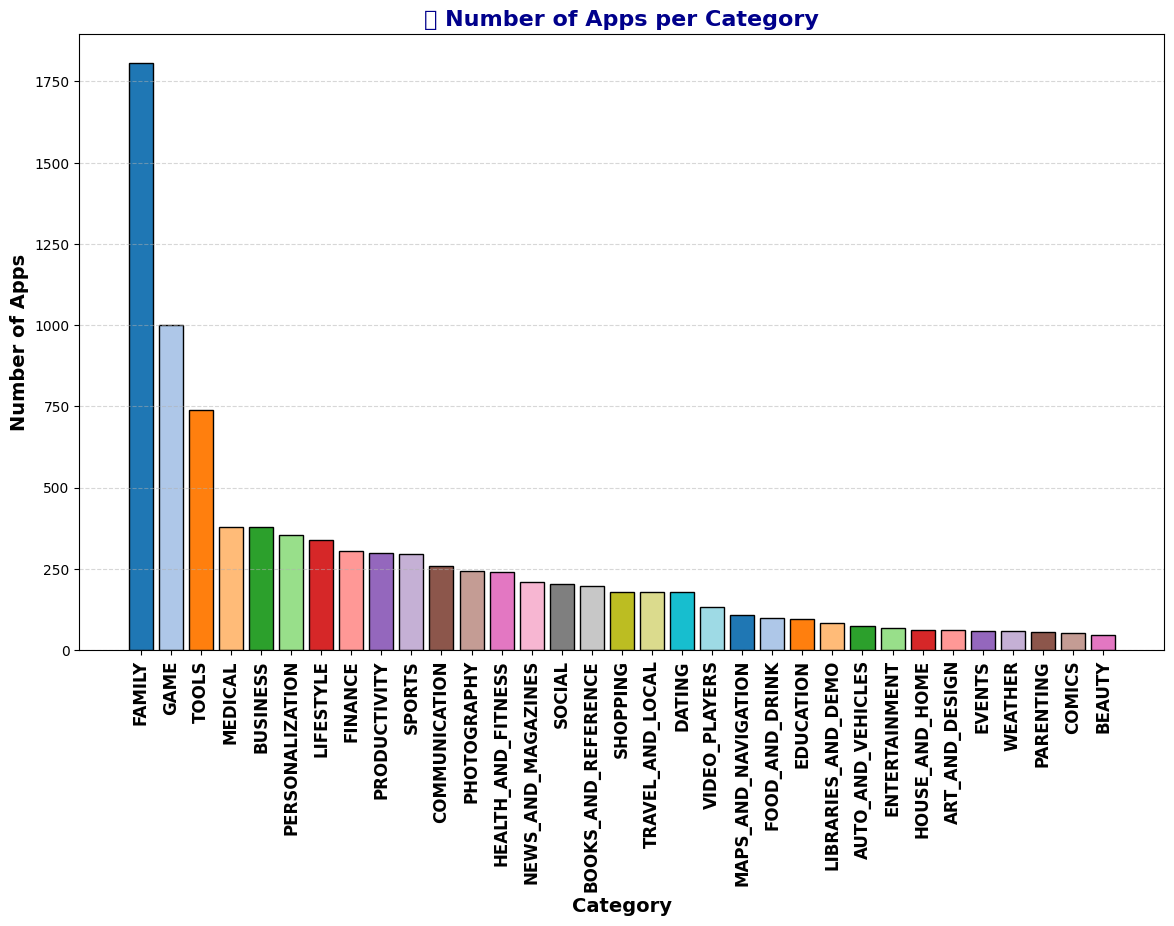

In [18]:
# Count the number of apps in each category
category_counts = df["Category"].value_counts()

# Generate 33 unique colors
colors = sns.color_palette("tab20", 33)  # "tab20" provides many distinct colors

# Create the bar chart
plt.figure(figsize=(14, 8))
plt.bar(category_counts.index, category_counts.values, color=colors, edgecolor="black")

# Titles and labels
plt.title("📊 Number of Apps per Category", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Category", fontsize=14, fontweight="bold")
plt.ylabel("Number of Apps", fontsize=14, fontweight="bold")

# Rotate x-axis labels
plt.xticks(rotation=90, fontsize=12, fontweight="bold")

# Add grid for clarity
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show the chart
plt.show()

## 3️⃣ Exploratory Data Analysis (EDA) 📈

### Question 3.1: Which categories have the most apps?
- The **Family** category has the highest number of apps, followed by **Game** and **Medical**.  
- **Business** and **Personalization** are also among the top 5 categories.  
- This suggests that the Play Store has a large variety of apps catering to families and entertainment.  
- Developers looking for opportunities may consider launching apps in trending categories.

<ipython-input-19-6b7cc5815f91>:31: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


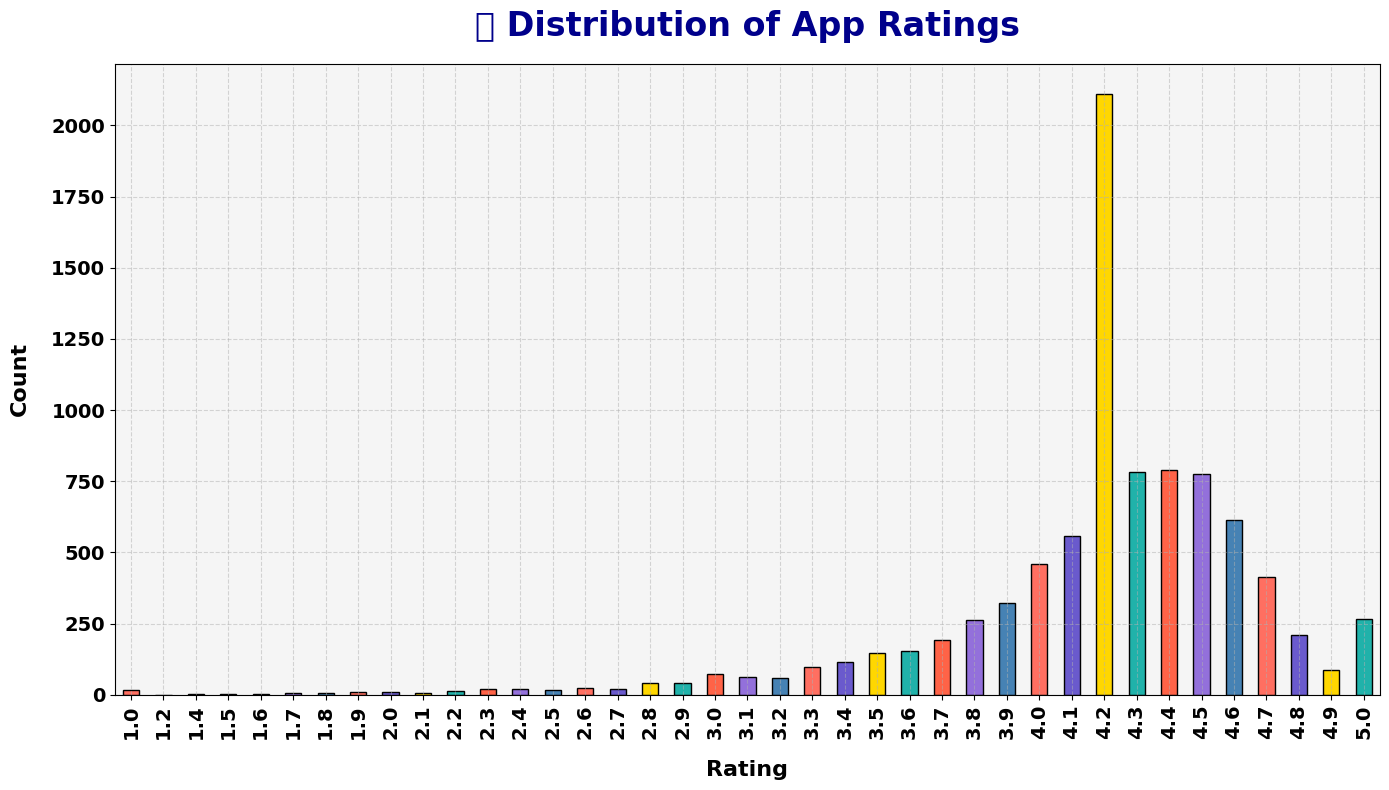

In [19]:
rating_counts = df['Rating'].value_counts().sort_index()  # Count and sort ratings in ascending order

# Create the bar chart with a larger figure size
plt.figure(figsize=(14, 8))  # Increase the size for a more spacious chart

rating_counts.plot(
    kind='bar', 
    color=['#FF6F61', '#6A5ACD', '#FFD700', '#20B2AA', '#FF6347', '#9370DB', '#4682B4'],  # Trendy colors
    edgecolor='black'  # Black borders for the bars
)

# Add titles and labels with bold styling
plt.title('✨ Distribution of App Ratings', fontsize=24, fontweight='bold', color='darkblue', pad=20)
plt.xlabel('Rating', fontsize=16, fontweight='bold', color='black', labelpad=15)
plt.ylabel('Count', fontsize=16, fontweight='bold', color='black', labelpad=15)

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90, fontsize=14, fontweight='bold', color='black')

# Adjust y-axis ticks for a cleaner look
plt.yticks(fontsize=14, fontweight='bold', color='black')

# Add a stylish grid for better clarity
plt.grid(visible=True, linestyle='--', alpha=0.5)

# Apply a light background to the plot area
plt.gca().set_facecolor('#F5F5F5')  # Light grey background for the plot
plt.gcf().set_facecolor('white')    # White background for the entire figure

# Apply tight layout to avoid label clipping
plt.tight_layout()

# Display the chart
plt.show()

### 📌 Question 3.2 : What is the distribution of app ratings?  
- The **most common rating is 4.2**, followed by 4.4 and 4.3.  
- This shows that most apps receive **positive feedback** from users.  
- Since ratings are a key factor in app success, **maintaining a rating above 4.0** is crucial for visibility and downloads.

In [20]:
bins = list(range(0, int(df["Size"].max()) + 20, 20))  # Creates bins with 20MB gaps
labels = [f"{bins[i]}-{bins[i+1]}MB" for i in range(len(bins)-1)]  # Create labels

# Categorize sizes into bins
df["Size Category"] = pd.cut(df["Size"], bins=bins, labels=labels, include_lowest=True)

# Display unique size categories
print(df["Size Category"].unique())

['0-20MB', '20-40MB', '40-60MB', '60-80MB', '80-100MB']
Categories (5, object): ['0-20MB' < '20-40MB' < '40-60MB' < '60-80MB' < '80-100MB']


In [21]:
size_vs_installs = df.groupby("Size Category")["Installs"].mean()

<ipython-input-21-9955e6eae5f2>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  size_vs_installs = df.groupby("Size Category")["Installs"].mean()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


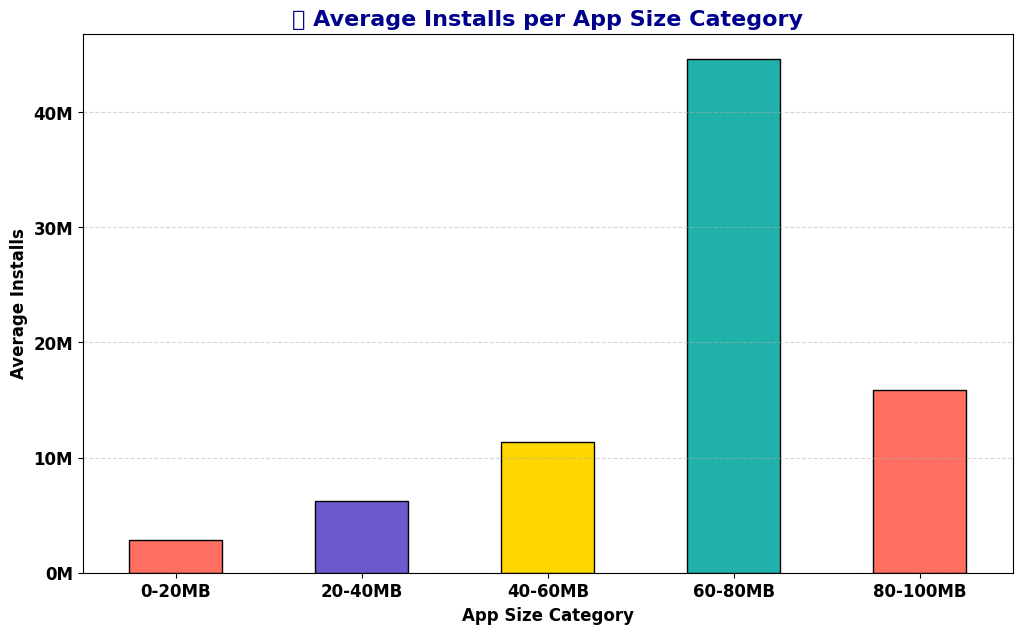

In [22]:
plt.figure(figsize=(12, 7))

# Bar chart with trendy colors
colors = ["#FF6F61", "#6A5ACD", "#FFD700", "#20B2AA"]
size_vs_installs.plot(
    kind="bar", 
    color=colors, 
    edgecolor="black"
)

# Titles and labels
plt.title("📊 Average Installs per App Size Category", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("App Size Category", fontsize=12, fontweight="bold")
plt.ylabel("Average Installs", fontsize=12, fontweight="bold")

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f"{x/1_000_000:.0f}M"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=0, fontsize=12, fontweight="bold", color="black")
plt.yticks(fontsize=12, fontweight="bold", color="black")

# Add a stylish grid
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

### 📌 Question 3.3 : Is there a relationship between app size and the number of installs? 
- Apps that are **60-80MB** receive **significantly higher installs** compared to other sizes.  
- This suggests that users prefer apps that are **not too large but still offer good features**.  
- Developers should optimize their app sizes for better adoption while ensuring quality.

In [23]:
# Group by category and sum the total installs
category_installs = df.groupby("Category")["Installs"].sum()

# Sort categories by total installs in descending order
top_5_categories = category_installs.nlargest(5)

# Display the result
print(top_5_categories)

Category
GAME                  2.680256e+10
FAMILY                6.697222e+09
TOOLS                 3.517095e+09
COMMUNICATION         3.336943e+09
NEWS_AND_MAGAZINES    3.215006e+09
Name: Installs, dtype: float64


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


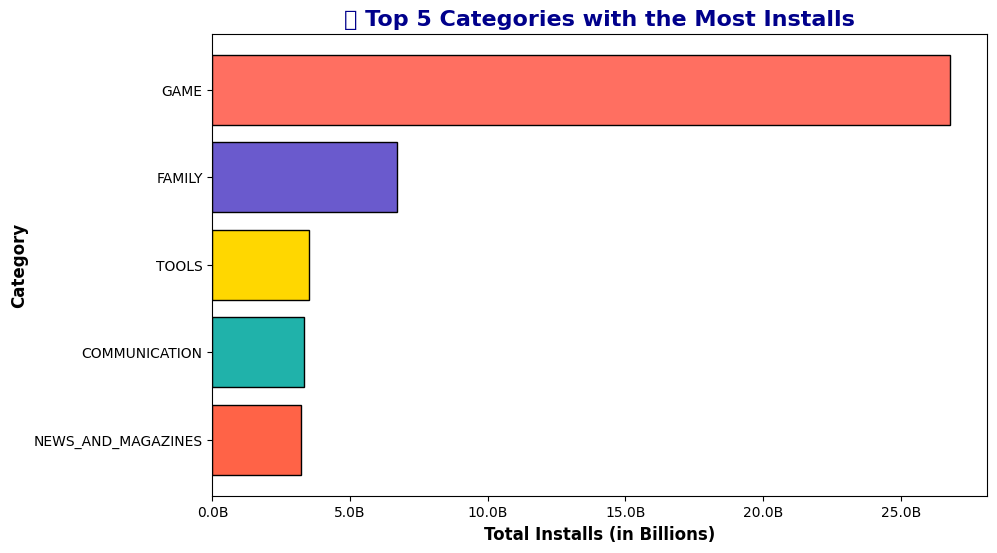

In [24]:
# Convert installs to billions (B)
top_5_categories_billion = top_5_categories / 1e9  # Convert to billions

# Set figure size
plt.figure(figsize=(10, 6))

# Define trendy colors
colors = ["#FF6F61", "#6A5ACD", "#FFD700", "#20B2AA", "#FF6347"]  # 5 colors

# Plot the horizontal bar chart
plt.barh(top_5_categories_billion.index, top_5_categories_billion.values, color=colors, edgecolor="black")

# Add titles and labels
plt.title("📊 Top 5 Categories with the Most Installs", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Total Installs (in Billions)", fontsize=12, fontweight="bold")
plt.ylabel("Category", fontsize=12, fontweight="bold")

# Format x-axis values in 'B' format (e.g., 1B, 2.5B)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1f}B"))

# Invert the y-axis to show the most popular categories at the top
plt.gca().invert_yaxis()

# Display the chart
plt.show()

### 📌 Question 3.4 : Which top 5 categories have the most installs?  
- The top 5 categories with the most installs (in ascending order) are **News & Magazines, Communication, Tools, Family, and Games**.  
- The **Game** category has **5x more installs** than the Family category, making it the most popular category.  
- Apps in the **Gaming and Utility** sectors have a massive user base, making them lucrative for developers.

In [25]:
# Set Pandas option to display full numbers without scientific notation
pd.set_option('display.float_format', '{:,.0f}'.format)

# Now display the top 100 apps with full install values
top_100_apps = df[['App', 'Installs']].copy().sort_values(by='Installs', ascending=False).drop_duplicates(subset='App', keep='first').head(100)

# Show top 10 apps
top_100_apps.head(10)

,App,Installs
1872,Subway Surfers,"1,000,000,000"
3736,Google News,"1,000,000,000"
1885,Pou,"500,000,000"
3569,Dropbox,"500,000,000"
1920,Temple Run 2,"500,000,000"
1869,Candy Crush Saga,"500,000,000"
3255,SHAREit - Transfer & Share,"500,000,000"
347,imo free video calls and chat,"500,000,000"
378,UC Browser - Fast Download Private & Secure,"500,000,000"
5596,Samsung Health,"500,000,000"


### 📌 Question 3.5 : Which top 100 apps have the highest installs?  
- The highest-installed apps include **Subway Surfers and Google News**, each with **1 Billion+ installs**.  
- Other popular apps include **Candy Crush Saga, SHAREit, and UC Browser** with **500M+ installs**.  
- This highlights that **gaming, communication, and utility apps** dominate the Play Store.  
- Developers can take inspiration from these successful apps when designing their own.

In [26]:
# Set a threshold for minimum reviews (adjust as needed)
min_reviews = 50  

# Filter apps with 5-star ratings and enough reviews
top_rated_apps = df[(df['Rating'] == 5.0) & (df['Reviews'].astype(float) >= min_reviews)]

# Sort by reviews to get the most popular ones
top_rated_apps = top_rated_apps.sort_values(by='Reviews', ascending=False)

# Display the top-rated apps
top_rated_apps[['App', 'Category', 'Rating', 'Reviews']]

,App,Category,Rating,Reviews
10357,Ríos de Fe,LIFESTYLE,5,141
10301,"FD Calculator (EMI, SIP, RD & Loan Eligilibility)",FINANCE,5,104
8058,Oración CX,LIFESTYLE,5,103
6823,Barisal University App-BU Face,FAMILY,5,100


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128226 (\N{PUBLIC ADDRESS LOUDSPEAKER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


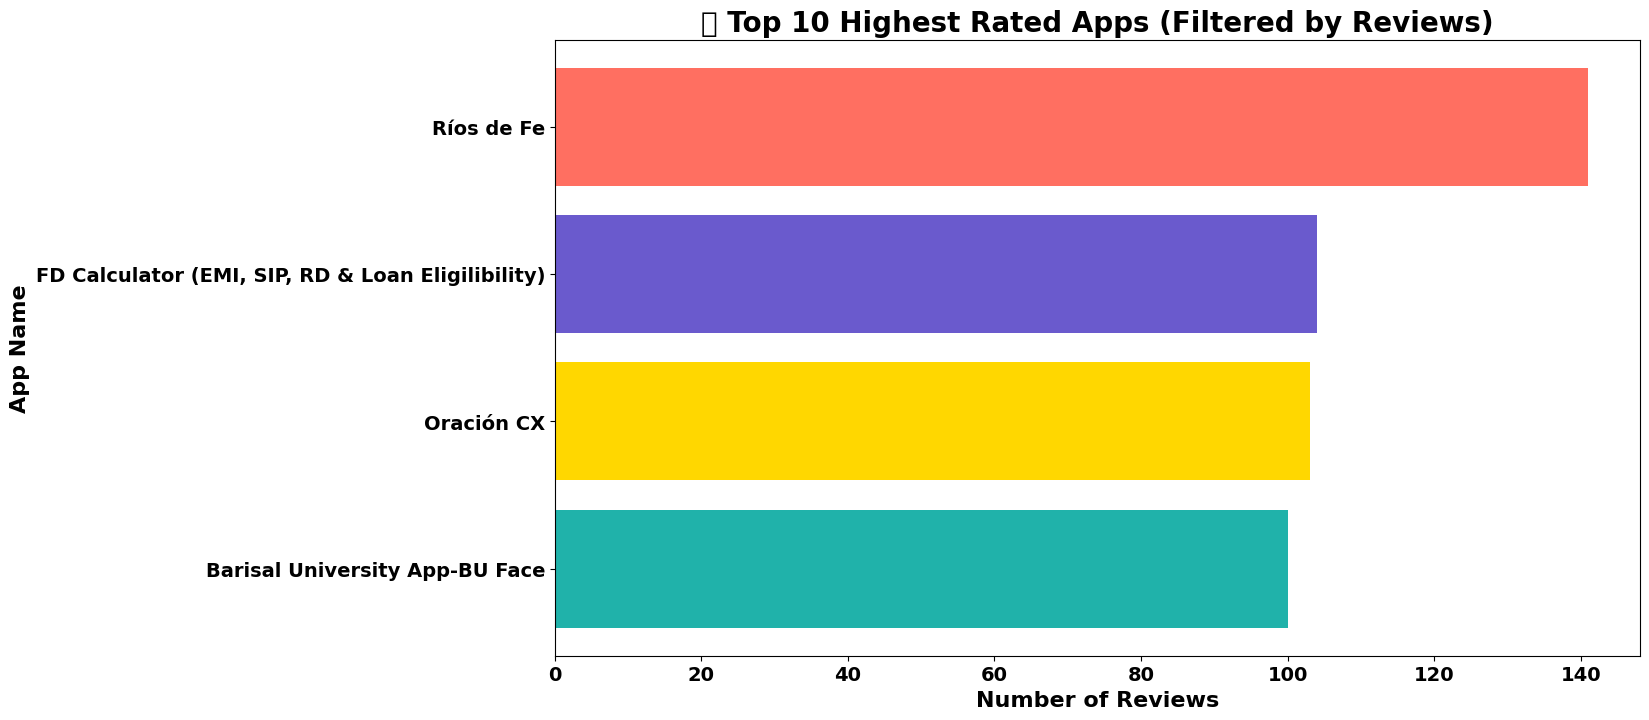

In [27]:
# Select the top 10 apps for better visualization
top_10_rated = top_rated_apps.head(10)

# Create a bar chart
plt.figure(figsize=(14, 8))
plt.barh(top_10_rated['App'], top_10_rated['Reviews'], color=['#FF6F61', '#6A5ACD', '#FFD700', '#20B2AA', '#FF6347'])

# Add labels and title
plt.xlabel("Number of Reviews", fontsize=16, fontweight="bold")
plt.ylabel("App Name", fontsize=16, fontweight="bold")
plt.title("📢 Top 10 Highest Rated Apps (Filtered by Reviews)", fontsize=20, fontweight="bold")

# Increase the font size of app names (y-axis) and review numbers (x-axis)
plt.xticks(fontsize=14, fontweight="bold", color="black")  # Number of reviews
plt.yticks(fontsize=14, fontweight="bold", color="black")  # App names

# Invert y-axis so the highest-rated app appears at the top
plt.gca().invert_yaxis()

plt.show()

### 📌 Question 3.6 : Which apps have the highest ratings?  
- The **top-rated apps (5-star ratings) belong to niche categories like Lifestyle and Finance**.  
- **Apps like "Ríos de Fe" (Lifestyle) and "FD Calculator" (Finance) received 5-star ratings with more than 50 reviews**.  
- These insights suggest that **highly specialized apps tend to receive strong user loyalty**.  
- Developers targeting a niche market should focus on user experience and reviews to maintain high ratings.

## 4️⃣ Insights & Final Conclusions 🏆  
- The **most popular app categories** are **Family, Game, and Medical**, showing high user engagement.  
- **Most apps receive a rating of 4.2 or higher**, proving that users are generally satisfied.  
- **App size influences installs**, with the **60-80MB** range performing the best.  
- **Game apps have the highest installs**, making them the dominant category on the Play Store.  
- **The most downloaded apps are games and utility apps**, highlighting their strong demand.  
- **Highly rated apps** are usually niche apps in categories like **Lifestyle and Finance**.  

**Key Takeaway:**  
For success in the Play Store, developers should focus on **popular categories, optimize app size, and maintain high ratings**. 🚀